## SVM Classification

### import required package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### read data from source and describing

In [2]:
df = pd.read_csv('hearing_test.csv')
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [3]:
print(df.columns)

Index(['age', 'physical_score', 'test_result'], dtype='object')


In [4]:
print(df.describe())

               age  physical_score  test_result
count  5000.000000     5000.000000  5000.000000
mean     51.609000       32.760260     0.600000
std      11.287001        8.169802     0.489947
min      18.000000       -0.000000     0.000000
25%      43.000000       26.700000     0.000000
50%      51.000000       35.300000     1.000000
75%      60.000000       38.900000     1.000000
max      90.000000       50.000000     1.000000


In [5]:
## chec for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB
None


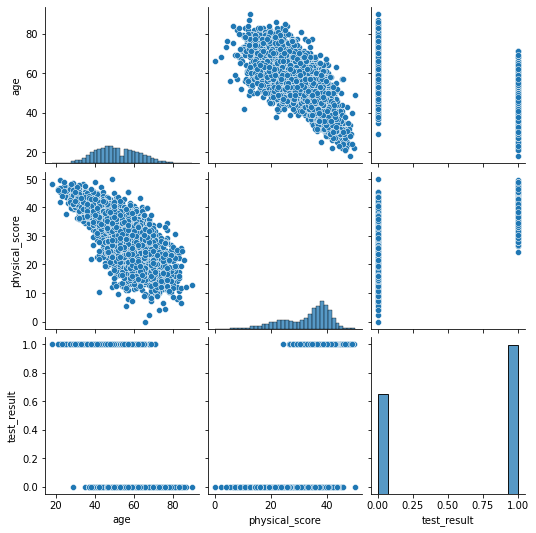

In [6]:
sns.pairplot(df)

### check the relation between variables

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap = 'Greens')

### select input and op variable

In [8]:
x = df.drop(['test_result'], axis=1)
y = df['test_result']

### splitting the data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 123456, train_size= 0.8)

### creating a model

In [10]:
from sklearn.svm import SVC
model = SVC(C = 2)

In [11]:
## fit the data
model.fit(x_train, y_train)

SVC(C=2)

### parameters to fine tune model

In [12]:
print(model.get_params())

{'C': 2, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### predict the values for unseen data

In [13]:
y_prediction = model.predict(x_test)
#print(y_prediction)


### evaluation of classification model

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[339  54]
 [ 21 586]]


In [15]:
correct = cm[0,0] + cm[1,1]
wrong = cm[1,0] + cm[0,1]
total = correct + wrong
accuracy = correct/total
print(accuracy)

0.925


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction))

0.925


### precision value

In [17]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_prediction))


0.915625


### recal value

In [18]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_prediction))


0.9654036243822076


### F1 score

In [19]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_prediction))

0.9398556535685646


### classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       393
           1       0.92      0.97      0.94       607

    accuracy                           0.93      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.93      0.93      0.92      1000



In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

print(roc_auc_score(y_test, y_prediction))

0.9139995221147679


[0.         0.13740458 1.        ]
[0.         0.96540362 1.        ]
[2 1 0]


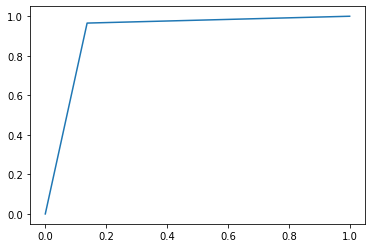

In [22]:
fpr, tpr, threshold = roc_curve(y_test, y_prediction)
print(fpr)
print(tpr)
print(threshold)
plt.plot(fpr, tpr)

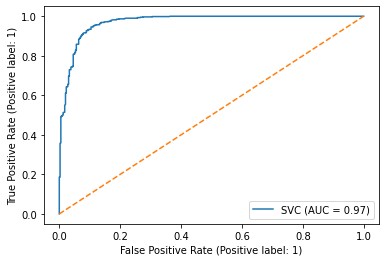

In [23]:
plot = plot_roc_curve(model, x_test, y_test)
plt.plot([0,1], [0,1], linestyle = '--')